In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Necessary to import pypwaves_updated.py from parent directory
import sys
sys.path.append('../')
import pypwaves_updated as pw

In [2]:
# Load data - Choose one

#Dublin data
#pls_file_dublin = "../../Data/dublin_sample/F_150326_125917.pls"
#pulsewave = pw.openPLS(pls_file_dublin)

#Brooklyn data
#pls_file_laptop = "../../Data/164239_pls/10552_NYU_M2_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_164239_1 - originalpoints.pls"
#pulsewave = pw.openPLS(pls_file_laptop)

pls_file_linux = "../../Data/200348_pls/10552_NYU_M3_Pulse_Waves_MTA_Resolved - Scanner 1 - 190511_200348_1 - originalpoints.pls"
pulsewave = pw.openPLS(pls_file_linux)
pickle_name = "anchors_200348.pkl"


### Looking at anchor points
I'm trying to determine whether or not anchor points indicate the location of the emitter when the pulse is sent/received, or is an arbitrary point.

In [3]:
def pull_pulses(pulsewave,pulse_count=None):
    '''this function extracts full pulse records into a dataframe'''
    pass

def pull_anchors(pulsewave,pulse_count=None):
    '''this function collects the x,y, and z anchors for each point in the pulsewave object.'''
    # Extract all the anchor points in each dimension
    if pulse_count == None:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(pulsewave.num_pulses)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(pulsewave.num_pulses)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(pulsewave.num_pulses)]
        gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(pulsewave.num_pulses)]
    else:
        x_anchors = [pulsewave.get_pulse(i).x_anchor for i in range(1000,pulse_count+1000)]
        y_anchors = [pulsewave.get_pulse(i).y_anchor for i in range(1000,pulse_count+1000)]
        z_anchors = [pulsewave.get_pulse(i).z_anchor for i in range(1000,pulse_count+1000)]
        gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(1000,pulse_count+1000)]

    # Create numpy array and pandas DF for easier manipulation
    anchor_arr = np.array([gps_time,x_anchors,y_anchors,z_anchors])
    anchor_df = pd.DataFrame(anchor_arr.T,columns=['gps_time','x','y','z'])
    return anchor_df

def denoise(df,low_quantile,high_quantile):
    '''takes the output of pull_anchors function, removes the outliers based on quantiles.'''
    quantile_10 = df.quantile(low_quantile)
    quantile_90 = df.quantile(high_quantile)
    df_denoised = df[df['x']>=quantile_10['x']]
    df_denoised = df_denoised[df_denoised['y']>=quantile_10['y']]
    df_denoised = df_denoised[df_denoised['z']>=quantile_10['z']]
    df_denoised = df_denoised[df_denoised['x']<=quantile_90['x']]
    df_denoised = df_denoised[df_denoised['y']<=quantile_90['y']]
    df_denoised = df_denoised[df_denoised['z']<=quantile_90['z']]
    return df_denoised

In [4]:
#anchor_df = pull_anchors(pulsewave)
#anchor_df.to_pickle(pickle_name)

anchor_df = pd.read_pickle("../../Data/pickles/"+pickle_name)

In [5]:
# I'm comparing the min and max to the 0.1 and 0.9 quantiles...
anchor_df.describe()

,gps_time,x,y,z
count,1.140819e+07,1.140819e+07,1.140819e+07,1.140819e+07
mean,5.906631e+05,9.782862e+05,1.735864e+05,1.043268e+03
std,1.449251e+01,9.962209e+02,6.016968e+02,2.598909e+02
min,5.906311e+05,9.761818e+05,1.721610e+05,3.154913e+02
25%,5.906510e+05,9.774506e+05,1.730939e+05,1.079812e+03
50%,5.906630e+05,9.782088e+05,1.736341e+05,1.140676e+03
75%,5.906753e+05,9.791085e+05,1.740758e+05,1.165812e+03
max,5.906885e+05,9.803088e+05,1.750566e+05,1.345637e+03


In [6]:
anchor_df.quantile([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9])

,gps_time,x,y,z
0.01,590634.330051,976431.46008,172462.833965,336.68925
0.10,590643.655572,976999.80210,172716.650050,439.13200
0.20,590648.629199,977309.67050,172968.275800,1051.24975
0.30,590653.450758,977594.11150,173211.263450,1107.87400
0.40,590658.223919,977895.10825,173433.633600,1126.48275
0.50,590662.977217,978208.79525,173634.056000,1140.67625
0.60,590667.764656,978541.43465,173830.715900,1150.48700
0.70,590672.767769,978912.76330,173991.714750,1160.55150
0.80,590677.974253,979315.98200,174165.979700,1169.14375
0.90,590683.277963,979734.15440,174363.799650,1192.48110


## Dublin Data

In [ ]:
# Extract all the timestamps
# gps_time = [pulsewave.get_pulse(i).gps_timestamp for i in range(300000,500000)]
# x_anchor = [pulsewave.get_pulse(i).x_anchor for i in range(300000,500000)]
# y_anchor = [pulsewave.get_pulse(i).y_anchor for i in range(300000,500000)]
# z_anchor = [pulsewave.get_pulse(i).z_anchor for i in range(300000,500000)]

# gps_arr = np.array([gps_time,x_anchor,y_anchor,z_anchor])
# gps_df = pd.DataFrame(gps_arr.T,columns=['gps_time','x_anchor','y_anchor','z_anchor'])
#gps_df.to_pickle("gps_time_164239.pkl")

# # Sort dataframe by gps_time
# gps_sorted = gps_df.sort_values(by=['gps_time'])

# # Plot GPS Time, X,Y,Z anchor coordinates for a portion of the file
# plt.figure(figsize=(20,20))
# plt.subplot(4, 1, 1)
# plt.plot(range(200000),gps_sorted['gps_time'])
# plt.ylabel("GPS Time")
# plt.title("Dublin sample run")

# plt.subplot(4, 1, 2)
# plt.plot(gps_sorted['gps_time'],gps_sorted['x_anchor'])
# plt.ylabel("X Anchor")

# plt.subplot(4, 1, 3)
# plt.plot(gps_sorted['gps_time'],gps_sorted['y_anchor'])
# plt.ylabel("Y Anchor")
# plt.xlabel("Pulse Record")

# plt.subplot(4, 1, 4)
# plt.plot(gps_sorted['gps_time'],gps_sorted['z_anchor'])
# plt.ylabel("Z Anchor")
# plt.xlabel("Pulse Record")

## Brooklyn Data

In [12]:
#anchors = pd.read_pickle(pickle_name)
anchor_df.sort_values(by=['gps_time'],inplace=True)

In [8]:
pulsewave.get_pulse(381).print_table()

gps_timestamp :  590642.120109
offset_to_waves :  62244
x_anchor :  976774.07175
y_anchor :  174055.651
z_anchor :  403.97475
x_target :  976744.688
y_target :  173984.668
z_target :  275.312
first_return :  2204
last_return :  2264
pulse_number :  381
pulse_descriptor :  200003
reserved :  [0, 0, 0, 0]
edge :  0
scan_direction :  0
facet :  [0, 0]
intensity :  0
classification :  0
dx :  -0.02938375000003725
dy :  -0.07098300000000746
dz :  -0.12866274999999996


In [57]:
print("Max time: ",anchor_df['gps_time'].max())
print("Min time: ",anchor_df['gps_time'].min())
print("Time spread: ",anchor_df['gps_time'].max() - anchor_df['gps_time'].min())

Max time:  590688.525255
Min time:  590631.066332
Time spread:  57.458923000027426


Text(0.5, 0, 'GPS Time')

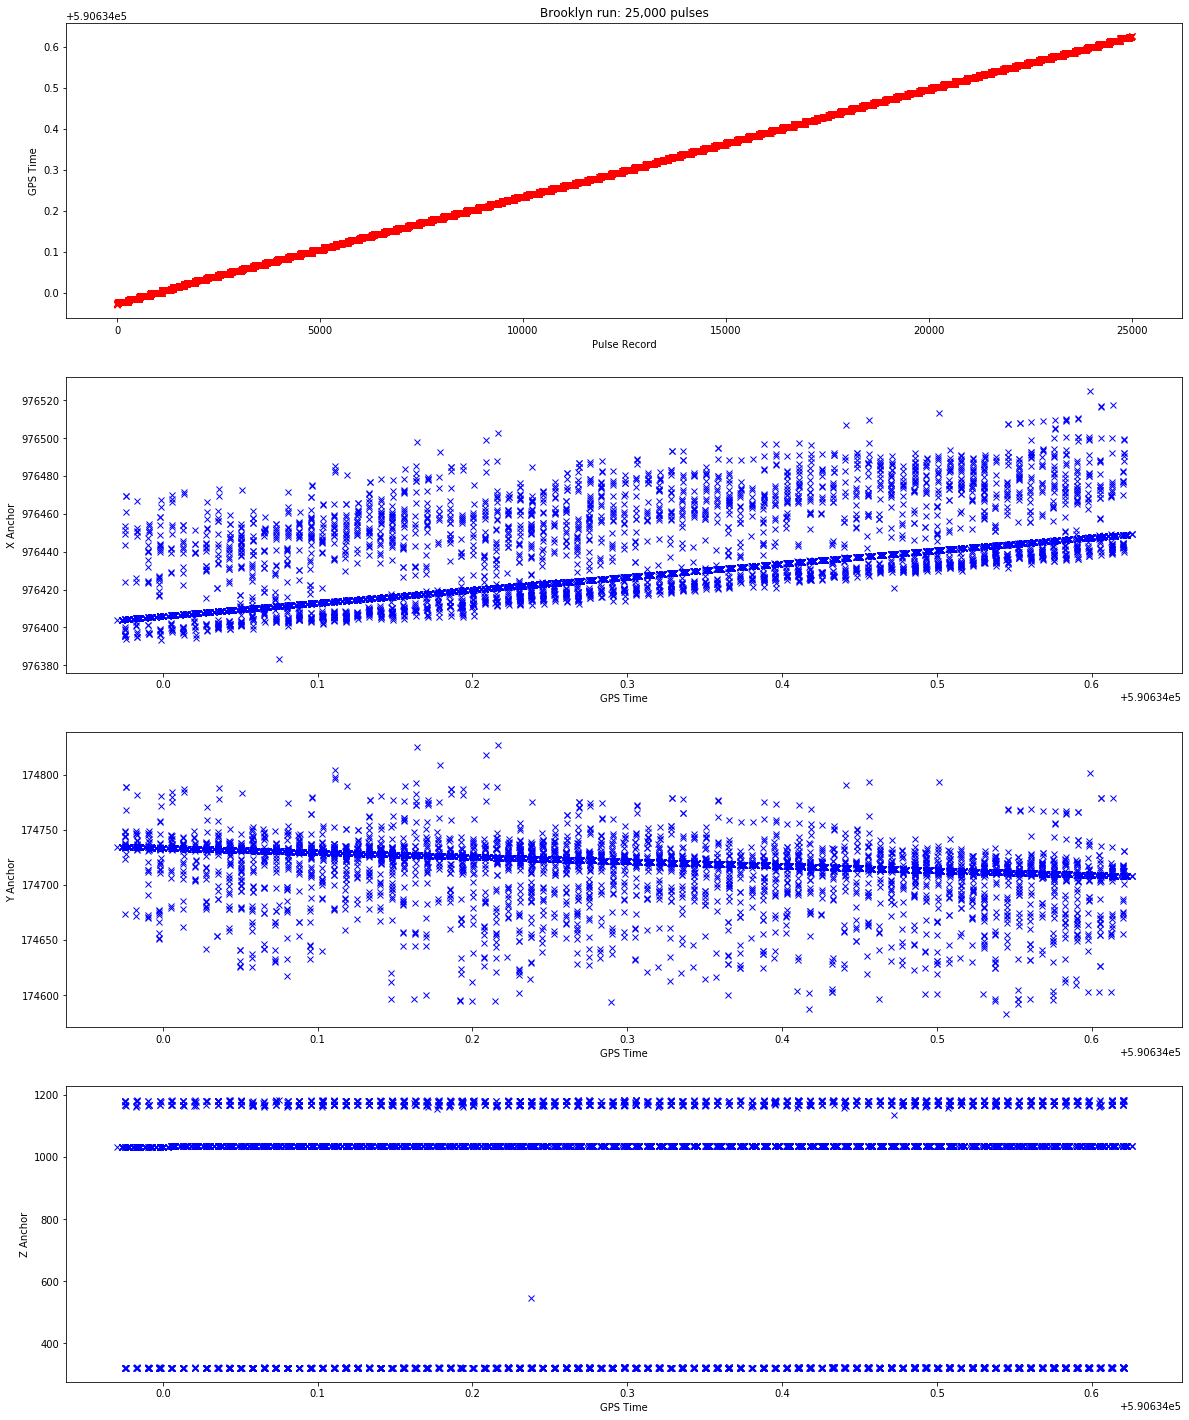

In [59]:
first_pulse = 100330
last_pulse =  125330

anchors_plot = anchor_df[first_pulse:last_pulse]

plt.figure(figsize=(20,25))
plt.subplot(4, 1, 1)
plt.plot(range(len(anchors_plot)),anchors_plot['gps_time'],'xr')
plt.ylabel("GPS Time")
plt.xlabel("Pulse Record")
plt.title("Brooklyn run: {:,d} pulses".format(last_pulse-first_pulse))

plt.subplot(4, 1, 2)
plt.plot(anchors_plot['gps_time'],anchors_plot['x'],'xb')
plt.ylabel("X Anchor")
plt.xlabel("GPS Time")

plt.subplot(4, 1, 3)
plt.plot(anchors_plot['gps_time'],anchors_plot['y'],'xb')
plt.ylabel("Y Anchor")
plt.xlabel("GPS Time")

plt.subplot(4, 1, 4)
plt.plot(anchors_plot['gps_time'],anchors_plot['z'],'xb')
plt.ylabel("Z Anchor")
plt.xlabel("GPS Time")

In [47]:
print("anchors shape: ",anchor_df.shape)
less = sum(anchor_df['z']<600)
more = sum(anchor_df['z']>600)
waymore = sum(anchor_df['z']>1200)
print(less)
print(more)
print(waymore)
print(less+more)
print("Percent below 600: {:2.2%}".format(less/(less+more)))
print("Percent above 1200: {:2.2%}".format(waymore/(less+more)))
print("Percent outlier: {:2.2%}".format((less+waymore)/(less+more)))

anchors shape:  (11408187, 4)
1639509
9768678
1097864
11408187
Percent below 600: 14.37%
Percent above 1200: 9.62%
Percent outlier: 23.99%


In [ ]:
# Outlier
pulsewave.get_pulse(8777438).print_table()

In [ ]:
# Outlier
pulsewave.get_pulse(2777439).print_table()

In [ ]:
pulsewave.get_pulse(8777440).print_table()

## Comparing with LAS file
GPS timestamps kind of line up...the overall timeframe is identical to ~5 digits, but the offset is very different and the points don't line up exactly.  Also the point counts don't align, even accounting for pulses with multiple returns in the .las file.

In [60]:
las_df = pd.read_pickle("../../Data/pickles/200348_points.pkl")

In [65]:
print("Num points: ",las_df.shape[0])
print("High: ",sum(las_df['z_scaled']>200))
print("Low: ",sum(las_df['z_scaled']<-200))

Num points:  14162455
High:  25116
Low:  45


In [60]:
las_min = las_df['gps_time'].min()
anchor_min = anchor_df['gps_time'].min()

In [61]:
las_df['gps_time_adj'] = las_df['gps_time']-las_min
anchor_df['gps_time_adj'] = anchor_df['gps_time']-anchor_min

In [71]:
# Noise points from anchor
noise_gps_times = anchor_df[anchor_df['z']<600]['gps_time_adj']
for time in noise_gps_times[:10000]:
    if time in las_df['gps_time_adj']:
        print("Yes!")

In [100]:
noise_gps_times[1000:1010]

178662    0.373331
178663    0.373334
178697    0.373370
178698    0.373406
178703    0.373460
178751    0.373515
178753    0.373610
178668    0.373732
178670    0.373804
211293    0.373913
Name: gps_time_adj, dtype: float64

In [106]:
las_df[las_df['gps_time_adj']>.37391][:10]

,X,Y,Z,intensity,flag_byte,classification_flags,classification_byte,user_data,scan_angle,pt_src_id,gps_time,x_scaled,y_scaled,z_scaled,gps_time_adj
13650,-712530,1930163,1039,249,17,0,0,0,-992,73,72249.440240,976287.470,174930.163,1.039,0.373910
13651,-712118,1931178,1198,1756,17,0,0,0,-1002,73,72249.440245,976287.882,174931.178,1.198,0.373915
13652,-711896,1931717,1214,367,17,0,0,0,-1007,73,72249.440247,976288.104,174931.717,1.214,0.373918
13653,-711691,1932222,1192,124,17,0,0,0,-1012,73,72249.440250,976288.309,174932.222,1.192,0.373921
13654,-710639,1934790,1354,824,17,0,0,0,-1038,73,72249.440263,976289.361,174934.790,1.354,0.373933
13655,-710427,1935321,1459,1858,17,0,0,0,-1044,73,72249.440266,976289.573,174935.321,1.459,0.373936
13656,-710225,1935816,1482,444,17,0,0,0,-1049,73,72249.440268,976289.775,174935.816,1.482,0.373939
13657,-594240,2218676,5130,1725,17,0,0,0,-3728,73,72249.441605,976405.760,175218.676,5.130,0.375276
13658,-594164,2218929,5984,1850,17,0,0,0,-3733,73,72249.441608,976405.836,175218.929,5.984,0.375278
13659,-593926,2219515,6127,1799,17,0,0,0,-3738,73,72249.441610,976406.074,175219.515,6.127,0.375281


In [99]:
las_df.iloc[1390:1408]

,X,Y,Z,intensity,flag_byte,classification_flags,classification_byte,user_data,scan_angle,pt_src_id,gps_time,x_scaled,y_scaled,z_scaled,gps_time_adj
1390,-808972,1801553,1278,3238,17,0,0,0,505,73,72249.116723,976191.028,174801.553,1.278,0.050394
1391,-808785,1802020,1101,275,17,0,0,0,500,73,72249.116726,976191.215,174802.020,1.101,0.050396
1392,-808367,1803071,1269,2937,17,0,0,0,490,73,72249.116731,976191.633,174803.071,1.269,0.050402
1393,-808171,1803566,1144,1305,17,0,0,0,485,73,72249.116733,976191.829,174803.566,1.144,0.050404
1394,-807975,1804064,1223,3560,17,0,0,0,480,73,72249.116736,976192.025,174804.064,1.223,0.050407
1395,-807759,1804600,1093,87,17,0,0,0,474,73,72249.116739,976192.241,174804.600,1.093,0.050409
1396,-807344,1805645,1154,1059,17,0,0,0,464,73,72249.116744,976192.656,174805.645,1.154,0.050414
1397,-807135,1806173,1214,87,17,0,0,0,458,73,72249.116747,976192.865,174806.173,1.214,0.050417
1398,-805110,1811271,1238,2602,17,0,0,0,407,73,72249.116772,976194.890,174811.271,1.238,0.050443
1399,-803672,1814879,1089,669,17,0,0,0,371,73,72249.116790,976196.328,174814.879,1.089,0.050461


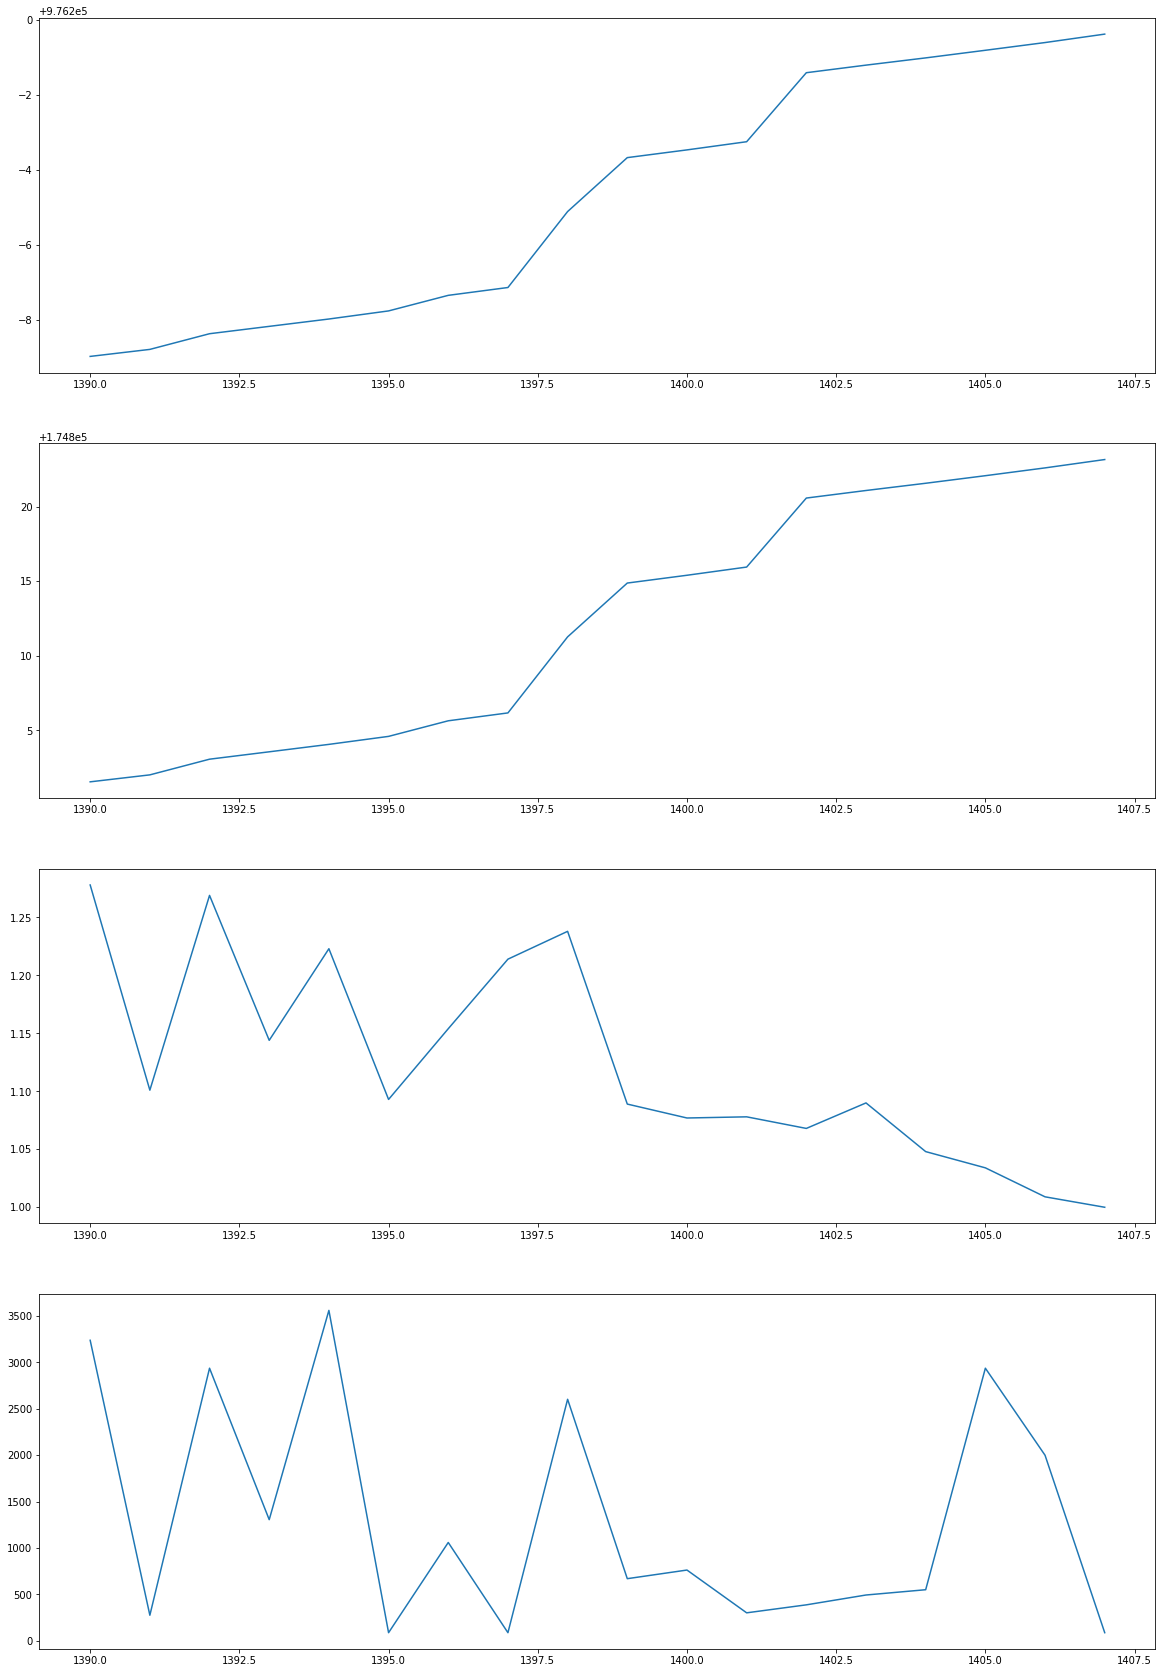

In [98]:
plt.figure(figsize=(20,30))
plt.subplot(4, 1, 1)
plt.plot(las_df['x_scaled'][1390:1408])

plt.subplot(4, 1, 2)
plt.plot(las_df['y_scaled'][1390:1408])

plt.subplot(4, 1, 3)
plt.plot(las_df['z_scaled'][1390:1408])

plt.subplot(4, 1, 4)
plt.plot(las_df['intensity'][1390:1408])

### Wave plotting

In [ ]:
wave = pulsewave.get_waves(5)
wave.plot()

In [ ]:
wave.smooth(7,3)
wave.plot()

In [ ]:
wave = pulsewave.get_waves(50)
type(wave)

In [ ]:
# pulse = pulsewave.get_pulse(10000)
# pulse.x_target

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict.keys():
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key])

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     tiff_tag = pulsewave.vlrs[34735].record.key_entry_dict[key].tiff_tag_location
#     if tiff_tag == 34736:
#         offset_6 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         value_6 = pulsewave.vlrs[34736].record[offset_6]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_6
#     elif tiff_tag == 34737:
#         offset_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset
#         len_7 = pulsewave.vlrs[34735].record.key_entry_dict[key].count
#         value_7 = pulsewave.vlrs[34737].record[offset_7:(offset_7+len_7)]
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = value_7
#     else:
#         pulsewave.vlrs[34735].record.key_entry_dict[key].value = pulsewave.vlrs[34735].record.key_entry_dict[key].value_offset

In [ ]:
# for key in pulsewave.vlrs[34735].record.key_entry_dict:
#     print(pulsewave.vlrs[34735].record.key_entry_dict[key].value)

In [ ]:
header_attrs = ['filename',
'file_sig',
'global_params',
'file_id',
'proj_GUID1',
'proj_GUID2',
'proj_GUID3',
'proj_GUID3',
'sys_id',
'software',
'file_day',
'file_year',
'version_maj',
'version_min',
'header_size',
'offset_to_pulses',
'num_pulses',
'pulse_format',
'pulse_attr',
'pulse_size',
'pulse_compression',
'reserved',
'num_vlr',
'num_avlr',
't_scale',
't_offset',
't_min',
't_max',
'x_scale',
'y_scale',
'z_scale',
'x_offset',
'y_offset',
'z_offset',
'x_min',
'x_max',
'y_min',
'y_max',
'z_min',
'z_max',]

def print_pulsewaves_header(pulsewave,header_attrs):
    '''prints all the header attribtes of a PulseWaves class.'''
    for attr in header_attrs:
        print(attr,": ",getattr(pulsewave,attr))

In [ ]:
print_header(pulsewave,header_attrs)

In [ ]:
pulse_record_attrs = ['gps_timestamp', 
'offset_to_waves', 
'x_anchor', 
'y_anchor', 
'z_anchor', 
'x_target', 
'y_target', 
'z_target', 
'first_return', 
'last_return', 
'pulse_number', 
'pulse_descriptor', 
'reserved', 
'edge', 
'scan_direction', 
'facet', 
'intensity', 
'classification', 
'dx', 
'dy', 
'dz']
pulse = pulsewave.get_pulse(123)

In [ ]:
for attr in pulse_record_attrs:
    print(attr,": ",getattr(pulse,attr))

In [ ]:
pulse = pulsewave.get_pulse(123)

In [ ]:
pulse.print_table()